There are numerous ways we could go about generating a set of points over the simplex. For example, we could randomly sample a uniform Dirichlet and map those points back to the x-y space. But that approach can result in undesirable display artifacts near the simplex boundaries for small values of α. As of version 1.3, matplotlib provides some convenient functions we can use for generating and refining triangular meshes. Let's start with the corners of our equilateral triangle and define a triangular mesh consisting of just a single element.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

Next, we'll subdivide the triangle into a triangular mesh and plot the original and subdivided triangles.

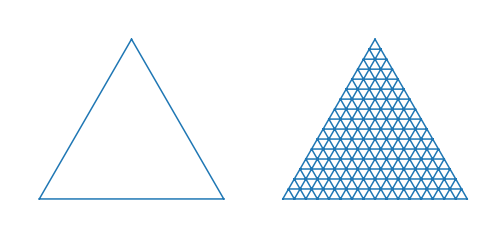

In [2]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

Map the x-y coordinates of the mesh vertices to the simplex coordinate space (barycentric coordinates)

Having the barycentric coordinates for our simplex mesh vertices, we then need to compute the Dirichlet pdf values for these coordinates.

In [3]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        print(self._alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])

And lastly, we just need a function to draw the contours for a distribution. The function will draw pdf contours for a Dirichlet distribution where θ1, θ2, and θ3 correspond to the lower left, lower right, and upper corners of the rendered triangle, respectively.

In [4]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

In [5]:
a = ([5,5,5])

b = ([1,3,5],[2,8,4],[1,6,7])
draw_pdf_contours(Dirichlet(a))

[5 5 5]


NameError: name 'xy2bc' is not defined